# DS Group Project (Fall 2022): Energy Demand Forecasting
--------------------------------
**Dr. Dave Wanik - University of Connecticut - Department of Operations and Information Management**

--------------------------

**Your Group Members:** 

In this project, you will be fitting, evaluating and interpreting models related to energy demand forecasting models. The kicker? You and your group will be competing against everyone else in the class! Highest grade (best MAE and RMSE) gets a 100, lowest grade gets an 80, and every other grade falls evenly dispersed between 80 and 100. Additional points will be removed if quality of notebook is poor. See rubric.

You are welcome to submit additional notebooks as an appendix - we only want your best work here, and your notebook should run from start to finish in 5 minutes or less (reach out to Dave early if this is an issue.)

Keep your modeling strategy to YOURSELVES! You may not to talk to other groups or students but you may ask the professor questions. Good luck!

**Note:** You may only use packages and methods covered in class. No ARIMA models and no deep learning models! You are welcome to use third-party feature engineering libraries. You may use autoML - but remember that it takes a long time to fit and that you may do better by focusing on feature engineering instead of modeling!

In [1]:
import time

In [2]:
# Timer 
start = time.time()

In [3]:
# https://drive.google.com/file/d/1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V/view?usp=sharing
!gdown 1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V

Downloading...
From: https://drive.google.com/uc?id=1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V
To: /content/BDL_cleanweather_energy (1).csv
100% 7.38M/7.38M [00:00<00:00, 118MB/s]


In [4]:
import pandas as pd
df = pd.read_csv('BDL_cleanweather_energy (1).csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96427 entries, 0 to 96426
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  96427 non-null  object 
 1   Demand    96427 non-null  float64
 2   BDL_tmpf  96160 non-null  float64
 3   BDL_dwpf  96160 non-null  float64
 4   BDL_relh  96160 non-null  float64
 5   BDL_drct  96160 non-null  float64
 6   BDL_sknt  96160 non-null  float64
 7   BDL_p01i  96160 non-null  float64
 8   BDL_alti  96160 non-null  float64
 9   BDL_mslp  96160 non-null  float64
 10  BDL_vsby  96160 non-null  float64
dtypes: float64(10), object(1)
memory usage: 8.1+ MB


Note that your data is currently sorted from newest to oldest. Make sure you sort from oldest to newest before performing any analysis or feature engineering.

## Data Dictionary
Scroll down to see the data dictionary.
* https://mesonet.agron.iastate.edu/request/download.phtml

The Demand column is energy usage across all of New England. The weather data is for Bradley Airport in Connecticut (BDL).

# (15 points) Exploratory Data Analysis
Create at least five interesting plots and tables that motivates your problem. Provide rich descriptions of each figure/table. Make a subheader for each plot and table so it's easy to grade.

In [6]:
# checking the data
df.head()

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
0,2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
1,2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2,2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
3,2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
4,2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [7]:
df.tail()

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
96422,2012-12-31 19:00:00,4158.0,33.98,19.94,56.02,190.0,7.0,0.0,29.86,1011.4,10.0
96423,2012-12-31 20:00:00,3920.0,33.08,21.02,60.81,190.0,7.0,0.0,29.84,1010.6,10.0
96424,2012-12-31 21:00:00,3708.0,33.08,21.02,60.81,180.0,7.0,0.0,29.82,1009.8,10.0
96425,2012-12-31 22:00:00,3497.0,33.08,21.02,60.81,180.0,7.0,0.0,29.80,1009.4,10.0
96426,2012-12-31 23:00:00,3281.0,33.98,21.02,58.66,200.0,6.0,0.0,29.79,1009.0,10.0


In [8]:
# Checking shape of data
df.shape

(96427, 11)

In [9]:
# checking missing values by column
df.isnull().sum()

Datetime      0
Demand        0
BDL_tmpf    267
BDL_dwpf    267
BDL_relh    267
BDL_drct    267
BDL_sknt    267
BDL_p01i    267
BDL_alti    267
BDL_mslp    267
BDL_vsby    267
dtype: int64

In [10]:
# there seems to be 267 mising values in each of our predictor columns
# since we have almost 10k rows, getting rid of the ones with missing values

df.dropna(axis = 0, inplace = True)

In [11]:
# chekcing if there is any mising values left

df.isnull().sum()

Datetime    0
Demand      0
BDL_tmpf    0
BDL_dwpf    0
BDL_relh    0
BDL_drct    0
BDL_sknt    0
BDL_p01i    0
BDL_alti    0
BDL_mslp    0
BDL_vsby    0
dtype: int64

In [12]:
# converting datetime column to correct data type
df['Datetime']= pd.to_datetime(df['Datetime'])

# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96160 entries, 0 to 96426
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  96160 non-null  datetime64[ns]
 1   Demand    96160 non-null  float64       
 2   BDL_tmpf  96160 non-null  float64       
 3   BDL_dwpf  96160 non-null  float64       
 4   BDL_relh  96160 non-null  float64       
 5   BDL_drct  96160 non-null  float64       
 6   BDL_sknt  96160 non-null  float64       
 7   BDL_p01i  96160 non-null  float64       
 8   BDL_alti  96160 non-null  float64       
 9   BDL_mslp  96160 non-null  float64       
 10  BDL_vsby  96160 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 8.8 MB


In [13]:
# Checking summary statistics of variables

df.describe()

,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
count,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000
mean,3388.871097,51.951929,39.643082,65.596163,221.359297,7.566077,0.005532,30.018212,1010.126411,9.340668
std,761.597507,19.318457,19.695832,21.408473,118.585969,4.771563,0.037132,0.290565,80.112071,1.978791
min,1372.000000,-11.020000,-27.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2843.720500,36.000000,24.980000,49.440000,170.000000,4.000000,0.000000,29.870000,1011.200000,10.000000
50%,3333.565000,52.000000,41.000000,66.635000,230.000000,7.000000,0.000000,30.020000,1016.300000,10.000000
75%,3813.664750,68.000000,55.940000,84.440000,330.000000,10.000000,0.000000,30.170000,1021.500000,10.000000
max,7219.000000,102.020000,78.080000,100.000000,360.000000,40.000000,1.960000,30.850000,1044.700000,10.000000


In [14]:
# Checking relationship among the variables

df.corr(method='spearman')

,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
Demand,1.000000,0.181963,0.086978,-0.271997,-0.009826,0.145432,0.002558,-0.059607,-0.056088,0.009374
BDL_tmpf,0.181963,1.000000,0.887074,-0.023923,-0.102343,0.058328,-0.065150,-0.221389,-0.228984,0.091532
BDL_dwpf,0.086978,0.887074,1.000000,0.400708,-0.147756,-0.096811,0.104016,-0.263386,-0.272916,-0.094819
BDL_relh,-0.271997,-0.023923,0.400708,1.000000,-0.099977,-0.317914,0.426816,-0.142750,-0.148432,-0.465074
BDL_drct,-0.009826,-0.102343,-0.147756,-0.099977,1.000000,0.313309,0.046510,-0.075562,-0.070379,0.048200
BDL_sknt,0.145432,0.058328,-0.096811,-0.317914,0.313309,1.000000,0.094902,-0.227674,-0.223774,0.080922
BDL_p01i,0.002558,-0.065150,0.104016,0.426816,0.046510,0.094902,1.000000,-0.200243,-0.205990,-0.503975
BDL_alti,-0.059607,-0.221389,-0.263386,-0.142750,-0.075562,-0.227674,-0.200243,1.000000,0.987667,0.149035
BDL_mslp,-0.056088,-0.228984,-0.272916,-0.148432,-0.070379,-0.223774,-0.205990,0.987667,1.000000,0.157346
BDL_vsby,0.009374,0.091532,-0.094819,-0.465074,0.048200,0.080922,-0.503975,0.149035,0.157346,1.000000


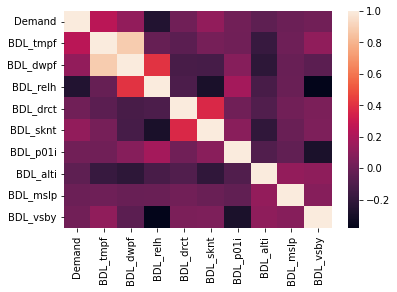

In [15]:
# visulaizing the correlation
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [16]:
# relative humidity seems to be strongly correlated with wind speed and visibility
# precipitation is also strongly correlated with visibility
# since this is weather data these correlations are expected

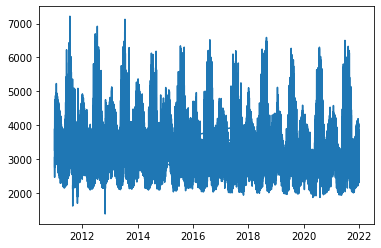

In [17]:
plt.plot(df['Datetime'], df['Demand'])
plt.show()

# (0 pts - up to you!) Feature Engineering
You may NOT use past energy usage as a feature in the model. Keep the target variable df['Demand'] separate from the other X features.

While it will be useful to set the datetime column as the index (to create temporal features for modeling), you should not use the raw time stamp in your model.

You are welcome to grab additional dataset to enrich your features for modeling - just be sure not to leak the target variable! Ask Dave if you want to make sure before submitting.

# Train/Test Split
Everyone will use Jan 1, 2019 and beyond as test data. Everything before this date is train data.

In [18]:
#Set date as index to split data into train and test 
df.set_index(df['Datetime'], inplace=True)
df.head() # the Date column is now the index  

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
Datetime,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
2019-01-01 01:00:00,2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2019-01-01 02:00:00,2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
2019-01-01 03:00:00,2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
2019-01-01 04:00:00,2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [19]:
# we separate the year 2012-2019 for train data
train_data = df['2012-01-01':'2018-12-31']
# train_data = train_data.reset_index(drop=True)
#Drop data column as this is not needed for modeling
train_data.drop(['Datetime'],inplace=True,axis=1)
#Check data is deleted 
train_data.head() 

,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
Datetime,,,,,,,,,,
2016-01-01 00:00:00,2761.034,37.04,24.98,61.35,320.0,8.0,0.0,30.01,1016.4,10.0
2016-01-01 01:00:00,2620.597,37.04,24.98,61.35,320.0,5.0,0.0,30.01,1016.3,10.0
2016-01-01 02:00:00,2513.333,35.96,24.98,64.03,260.0,4.0,0.0,30.01,1016.4,10.0
2016-01-01 03:00:00,2461.453,35.96,24.98,64.03,250.0,4.0,0.0,30.01,1016.3,10.0
2016-01-01 04:00:00,2465.844,35.96,24.98,64.03,230.0,3.0,0.0,29.99,1015.8,10.0


In [20]:
train_data.shape

(61272, 10)

In [21]:
# we separate the year 2020 for test data 
test_data = df['2019-01-01':'2019-12-31']
#Delete data column as we no longer need it 
# test_data = test_data.reset_index(drop=True)
test_data.drop(['Datetime'],inplace=True,axis=1)
#Check data column is deleted 
test_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
Datetime,,,,,,,,,,
2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [22]:
test_data.shape

(8759, 10)

In [23]:
# Now let us finally split the data!
y_train = train_data['Demand']
X_train = train_data.drop(['Demand'], axis = 1)

y_test = test_data['Demand']
X_test = test_data.drop(['Demand'], axis = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(61272, 9) (61272,)
(8759, 9) (8759,)


# (5 pts) Baseline Model
You should calculate at least ONE time series baseline model (a linear regression, mean only model, using yesterday's energy usage as today's energy usage...) Your choice. Make sure you describe what you did and compare your model to it later on.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, KFold
import numpy as np

In [25]:
# We will create a Linear Regression pipeline as our baseline with Standard Scaling
LR_pipeline = Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])

In [26]:
LR_pipeline.fit(X_train, y_train)
test_preds = LR_pipeline.predict(X_test)

In [27]:
print(f"RMSE: {mean_squared_error(y_test, test_preds, squared = False)} \nMAE: {mean_absolute_error(y_test, test_preds)}")

RMSE: 693.7747403286996 
MAE: 574.3662935636823


The model above is very simply a linear regression model with a standard scaler for preprocessing. The performance is not that great, which makes sense since an LR model is not expected to detect seasonality, which is an important component of this dataset.

# (10 pts) Your Best Model
We only want to see your best model. Feel free to experiment in other notebooks (you can submit as an appendix) to identify the best hyperparameters. But at the end of the day, we only want your BEST.

If you used autoML then it should be in a different notebook - we only want your best pipeline here! Your model should train very quickly.

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
# We know that RandomForest + StandardScaler is the best pipeline in terms of performance. Now let us get the best version of this baseline model/pipeline!
rfr_pipeline = Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())])

In [30]:
# Here are the best parameters we found through Cross Validation. We can apply these to our pipeline.
best_params = {'RFR__max_depth': 13, 'RFR__max_features': 6, 'RFR__min_samples_split': 8, 'RFR__n_estimators': 100, 'RFR__oob_score': False, 'RFR__warm_start': True}
best_pipe = Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())]).set_params(**best_params)
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('RFR',
                 RandomForestRegressor(max_depth=13, max_features=6,
                                       min_samples_split=8, warm_start=True))])

In [31]:
test_preds = best_pipe.predict(X_test)

The model above was first and foremost found through model spot checking and furthermore through multiple runs of CVGridSearch. Many adjustments had to be made with features such as n_estimators and max_depth. These had to be made after verifying the fit qualitatively and seeing that there was a limit for the lower end of the predictions (i.e., there was a limit to how low the demand predictions could be). After seeing that max_depth, and max_features was almost always at its highest when running different variations of CVGridSeach, a higher range was introduced to all of these to see how much higher the optimal parameters would be. After seeing that a higher range fit the training set well, and gave even better scores to the test set (no overfitting to train), these were decided upon. Process of spot checking, hyperparameter tuning, can be found in appendix.

Here is our appendix link: 
https://colab.research.google.com/drive/13Yql7M2C4Ehi62biWdBjwjN24_7e3ufw?usp=sharing

# (30 pts total) Model Evaluation
Now that your model has fit, it's time to dig into the results.

## (15 points) Quantitative
You should calculate the R2, MAE and RMSE (make sure you check the arguments!)

In [32]:
print(f"RMSE: {mean_squared_error(y_test, test_preds, squared = False)} \nMAE: {mean_absolute_error(y_test, test_preds)} \nR2: {r2_score(y_test, test_preds)}") # check w warm start true and false

RMSE: 491.527733745438 
MAE: 397.44985740368594 
R2: 0.5056695414890081


## (15 points) Qualitative
Feel free to create time series plots and go into detail on where your model was very successful vs. very poor. I want you to show off!

At the very least you should have:
* scatterplots of actual vs. predicted
* time series plots of actual vs. predicted

Create at least three other interesting plots to show the value of your model. Add rich captions to each plot that describes the value of what you did.

In [33]:
import seaborn as sns

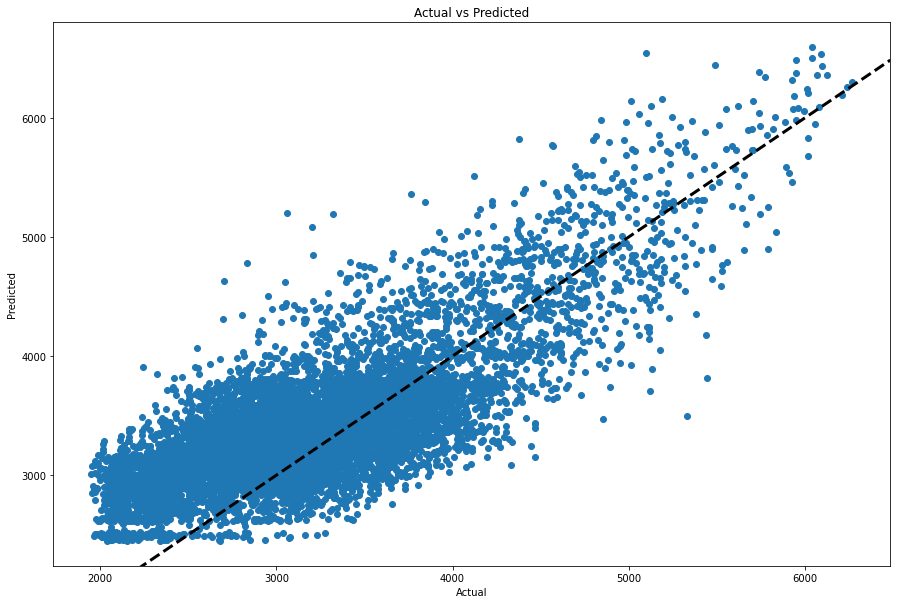

In [34]:
# actual vs predicted scatterplot

plt.figure(figsize = [15, 10])
plt.scatter(y_test, test_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False) # 45 degree line
plt.show()

Through the graph above, we can see that our predictions overestimate the lower end of the actual values of demand, but around after 3000 demand, the predictions become more and more accurate (no explicit over/under estimation overall).

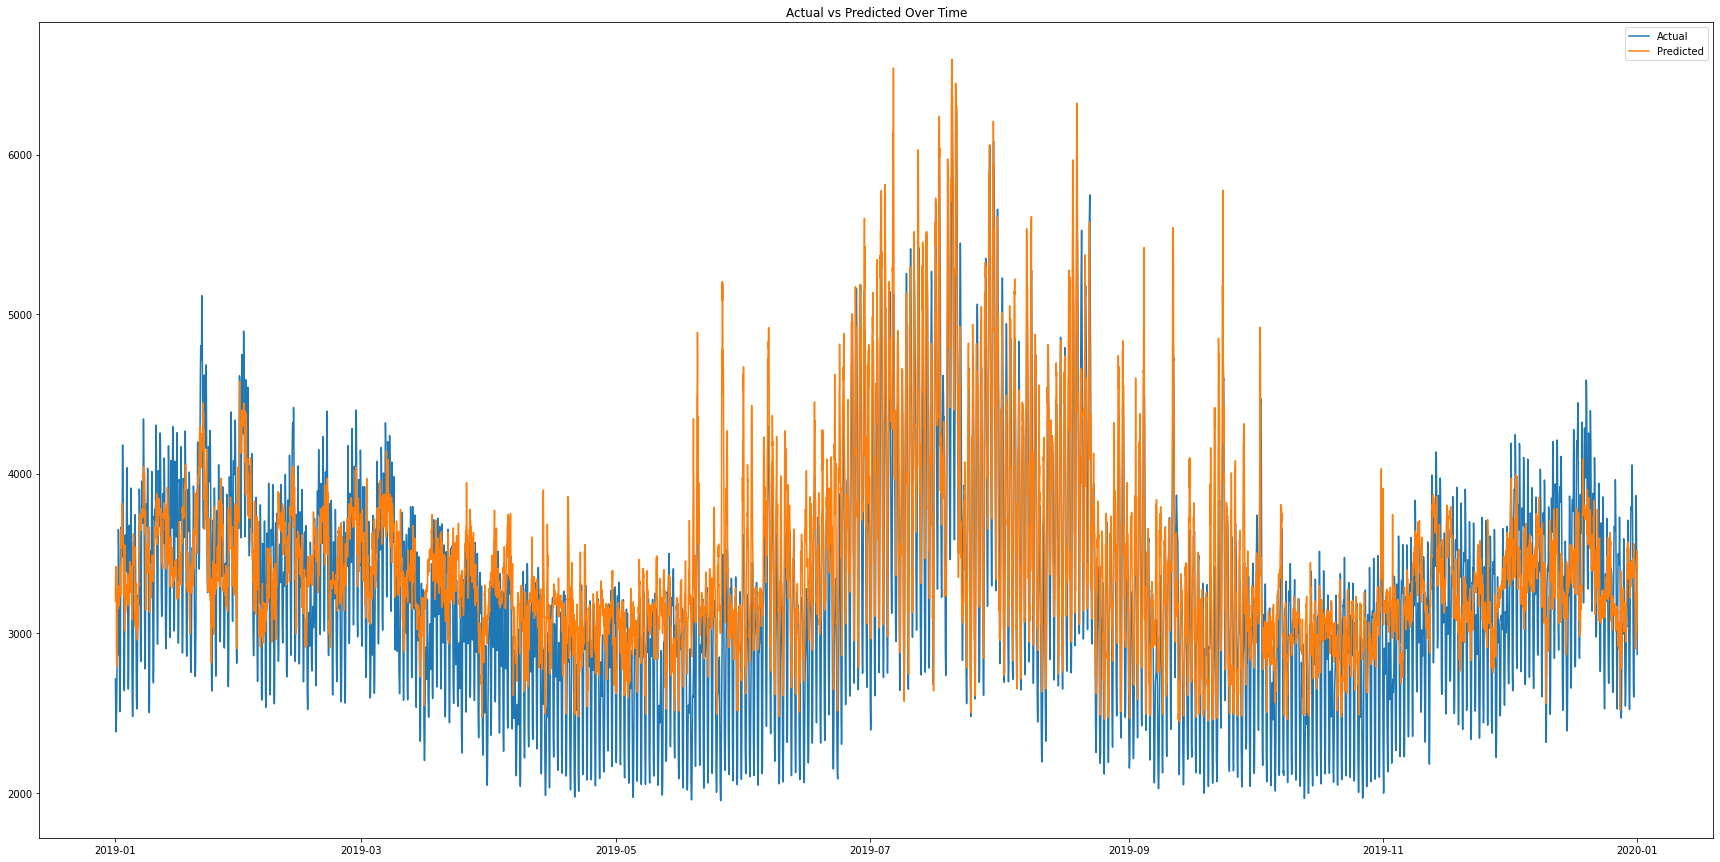

In [35]:
# Actual vs Predicted

test_preds = pd.DataFrame(test_preds).set_index(y_test.index)

plt.figure(figsize = [30, 15])
plt.plot(y_test.index, y_test)
plt.plot(test_preds.index, test_preds[0])
plt.title('Actual vs Predicted Over Time')
plt.legend(['Actual', 'Predicted'])
plt.show()

Here on this graph above, we can see the way our model behaves relative to the data much more clearly. In fact, this was used to adjust hyperparameters. The reason being is that the model had a limited lower range of predictions. This is since most of the data is tightly packed as seen through the solid blue parts of the graph, these areas skewed the model. Nonetheless, the model still overestimates in general as we will see in the next few plots.

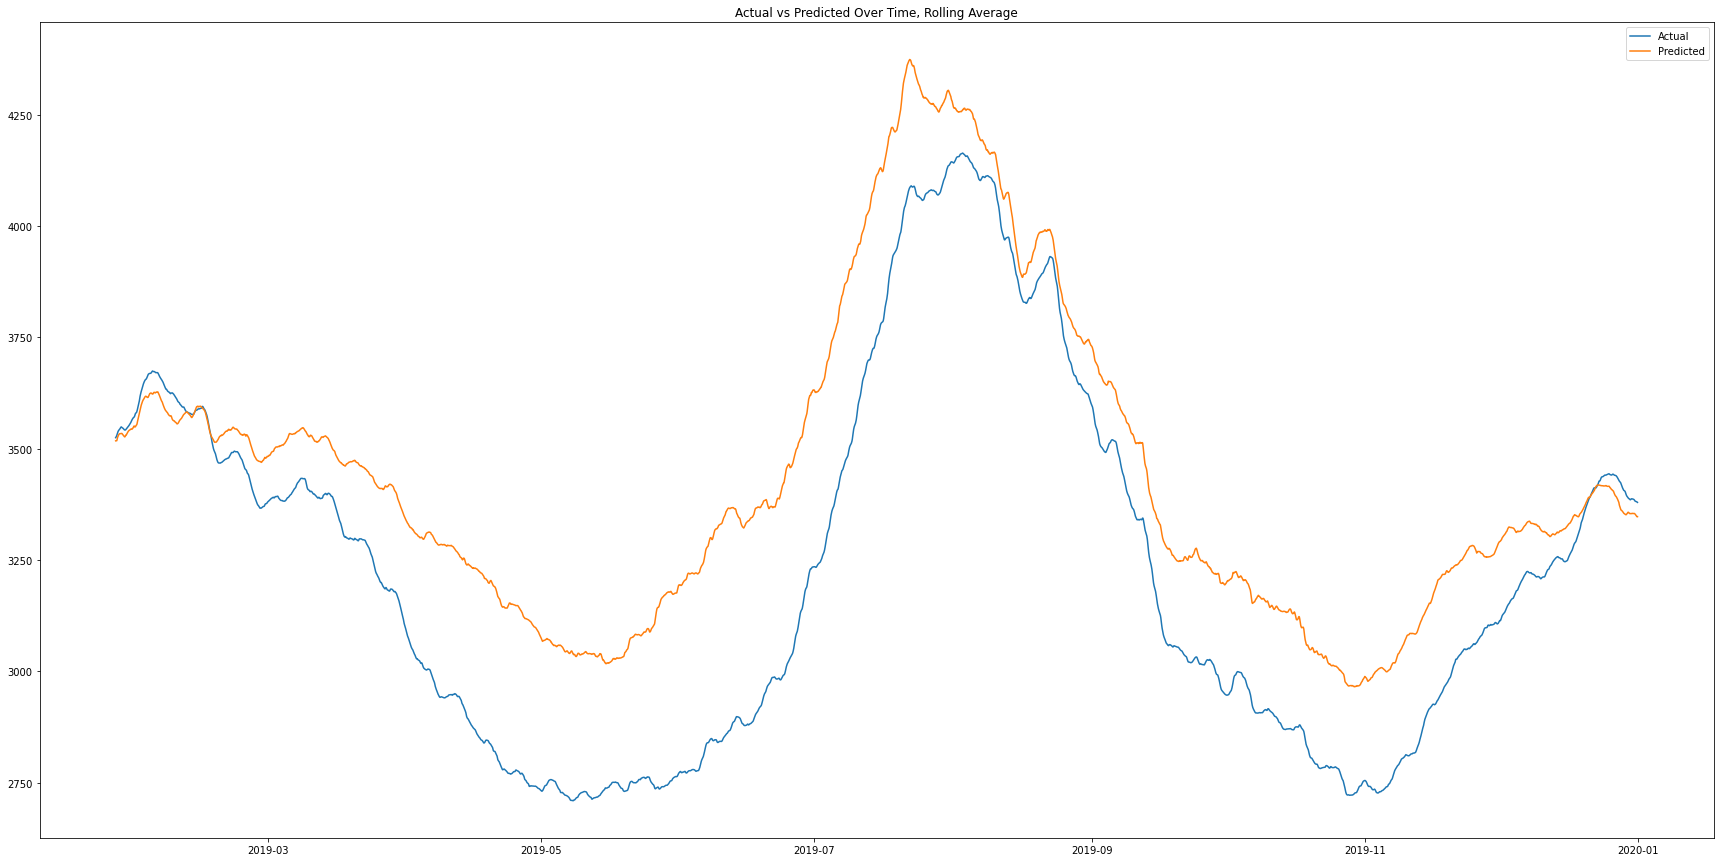

In [36]:
# Rolling Average Plot

plt.figure(figsize = [30, 15])
plt.plot(y_test.index, y_test.rolling(600).mean())
plt.plot(test_preds.index, test_preds[0].rolling(600).mean())
plt.title('Actual vs Predicted Over Time, Rolling Average')
plt.legend(['Actual', 'Predicted'])
plt.show()

Above, we have an adjusted version of the previous graph. Instead of displaying the raw data, which has a large amount of variance, we calculated the rolling average with a window of 600 rows. One very important detail of this plot  is that through this, we can see how the large mound of demand between June and August are the most well predicted few months.

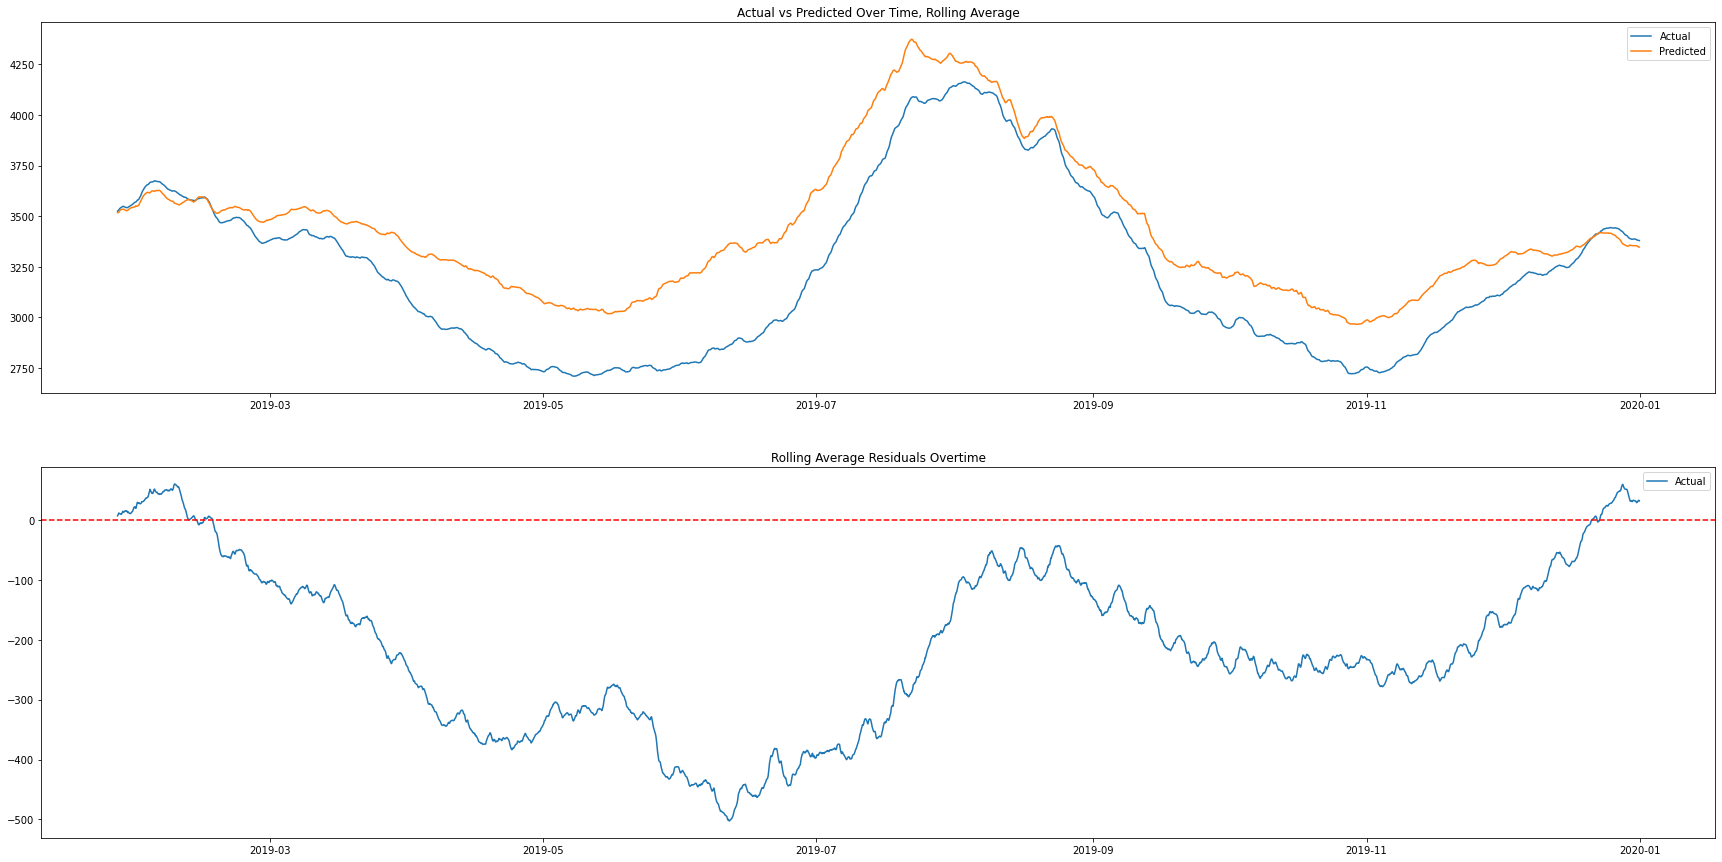

In [37]:
# Rolling Average of Actual vs Predicted versus Rolling Average of Residuals Over Time


# Plot into first subplot
plt.subplots(2, 1, figsize = (30, 15))
plt.subplot(2, 1, 2)
plt.plot(y_test.index, (y_test-test_preds[0]).rolling(600).mean())
plt.title('Rolling Average Residuals Overtime')
plt.legend(['Actual', 'Predicted'])
plt.axhline(y = 0, color = 'r', linestyle = '--')

# Plot into second subplot
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test.rolling(600).mean())
plt.plot(test_preds.index, test_preds[0].rolling(600).mean())
plt.title('Actual vs Predicted Over Time, Rolling Average')
plt.legend(['Actual', 'Predicted'])

plt.show()

Here, we see a comparison of the Rolling Average Actual vs Predicted plot with a plot of the rolling average residuals overtime. Here we see, in a more assisted manner, the areas that are worst predicted, which are around March to July and Septermber to December. This may possibly be because of random patterns of weather that we experience in Connecticut from time to time. For example, sometimes we approach Winter or Fall and we have a cold week where it may even snow, followed by a hot week (both of which would have different implications for dataset features). It's possible that these irregular patterns, which also occur around Spring, confuse the model.

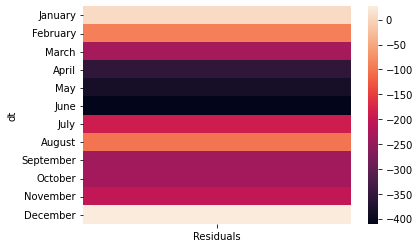

In [38]:
# Average residuals by month
residuals = pd.DataFrame()
residuals['Residuals'] = y_test-test_preds[0]
residuals['dt'] = pd.to_datetime(y_test.index).strftime('%B')

# Get average residuals per month
residuals_gb = residuals.groupby(by = residuals['dt']).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

residuals_gb = residuals_gb.reindex(new_order, axis=0)
sns.heatmap(residuals_gb)

Finally, here we can see the average residuals by month. This is an important plot because there are specific conditions that characterize each month (e.g., seasons) that may derive important insights. Here, we can clearly see that the negative trend in residuals begins in February and ends in June, followed by the next trend. Again, the theory of irregular weather patterns affecting predictions still stands.

# (30 points total) Model Interpretability

## (15 points) Permutation Importance
Which variables are most important? Show as a boxplot.

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

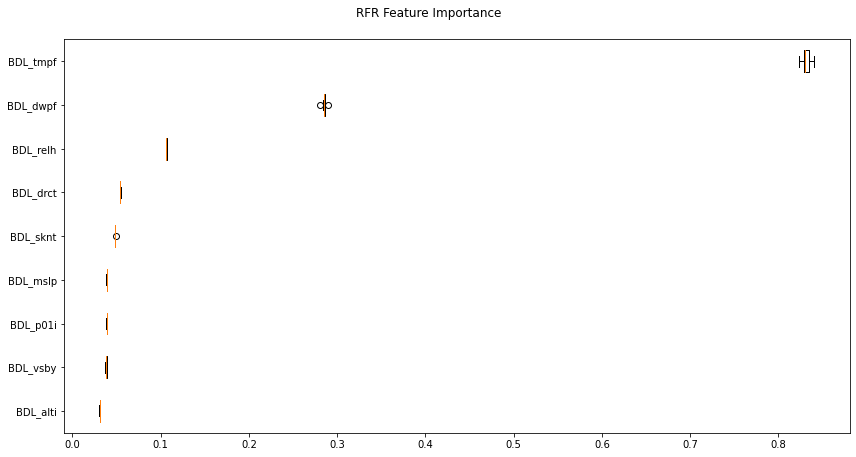

In [40]:
from sklearn.inspection import permutation_importance

# let's make this repeatable! all you need to do is assign
# a model object to clf!

clf = best_pipe

result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
fig.suptitle('RFR Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

## (15 points) Partial Dependence
How is the model treating your important variables? Does anything surprise you?

In [41]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.2 MB/s 
     |████████████████████████████████| 37.8 MB 213 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=59c217f46716b67efd8c19eb21257180d4490c2d3dace03e30c4b0c0051772b2
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152123 sha256=942cc149486f239c81ccc7711063ac37baba16a2e841bf284fa5cb5964272c5a
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6ef5856d45b1b4496a929b9574ad6f2f46cd6e25b4b709d9add86e19c4bcfc13
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f6

In [42]:
from pdpbox import pdp, get_dataset, info_plots

### Top1 PDP for feature "BDL_tmpf"

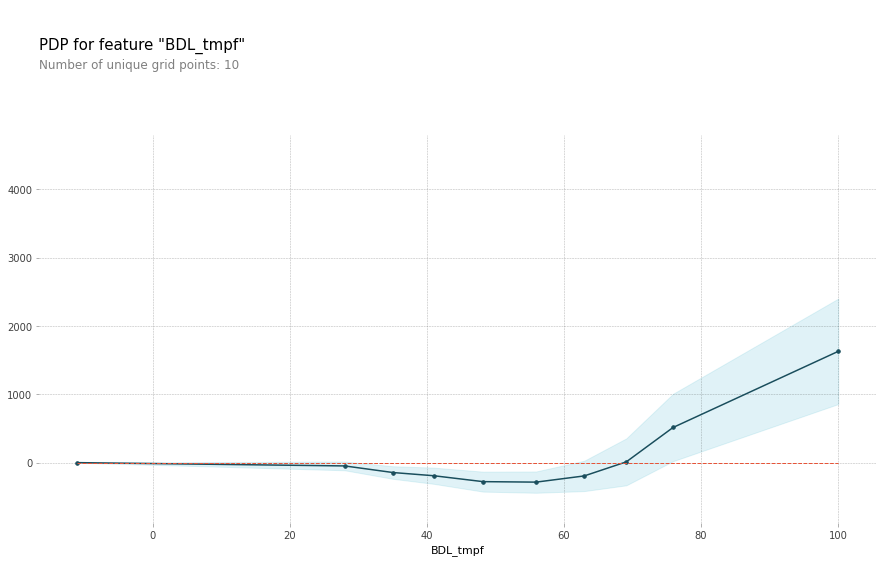

In [43]:
pdp_goals = pdp.pdp_isolate(model=clf, dataset=X_train, model_features=X_train.columns, feature=X_train.columns[0])
pdp.pdp_plot(pdp_goals, X_train.columns[0])
plt.show()

The largest differences can be seen in the Air Temperature in Fahrenheit. The higher the temperature, the more energy demanding.

When the Air Temperature in Fahrenheit is greater than about 70, the energy demand increases sharply as the temperature increases.

When the Air Temperature in Fahrenheit is between 25 and 70, as the temperature increases, the energy demand is slightly lower than 0 and tends to 0.

### Top 2 PDP for feature "BDL_dwpf"

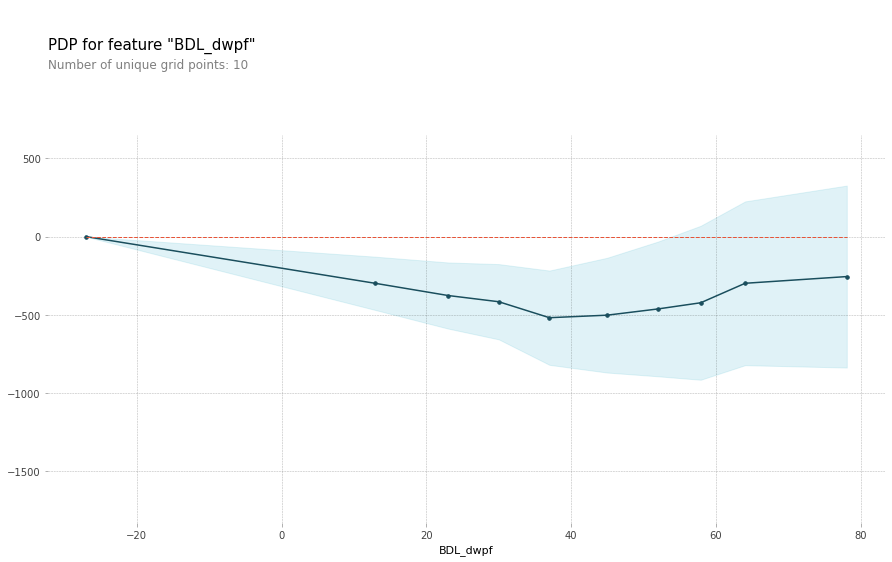

In [44]:
pdp_goals = pdp.pdp_isolate(model=clf, dataset=X_train, model_features=X_train.columns, feature=X_train.columns[1])
pdp.pdp_plot(pdp_goals, X_train.columns[1])
plt.show()

With the increase of Dew Point Temperature in Fahrenheit, the energy demand is lower than 0 as a whole.

When the Dew Point Temperature is less than about 40, with the increase of the Dew Point Temperature, the energy demand will show a downward trend. When the Dew Point Temperature is greater than about 40, with the increase of the Dew Point Temperature, the energy demand is gradually increasing.

### Top 3 PDP for feature "BDL_relh"

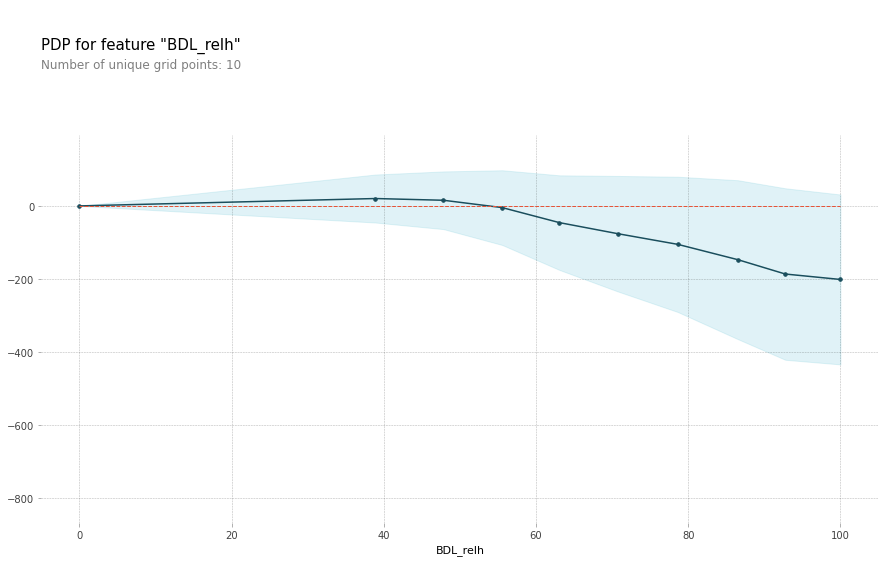

In [45]:
pdp_goals = pdp.pdp_isolate(model=clf, dataset=X_train, model_features=X_train.columns, feature=X_train.columns[2])
pdp.pdp_plot(pdp_goals, X_train.columns[2])
plt.show()

When the Relative Humidity is around 0 to 55, as the Relative Humidity increases, the energy demanding area is balanced and located near 0. When the Relative Humidity is greater than about 55, with the increase of the Relative Humidity, the energy demand is gradually decreasing. 

But the range of energy demand change is smaller than that of Air Temperature and Dew Point Temperature

### Top 4 PDP for feature "BDL_drct"

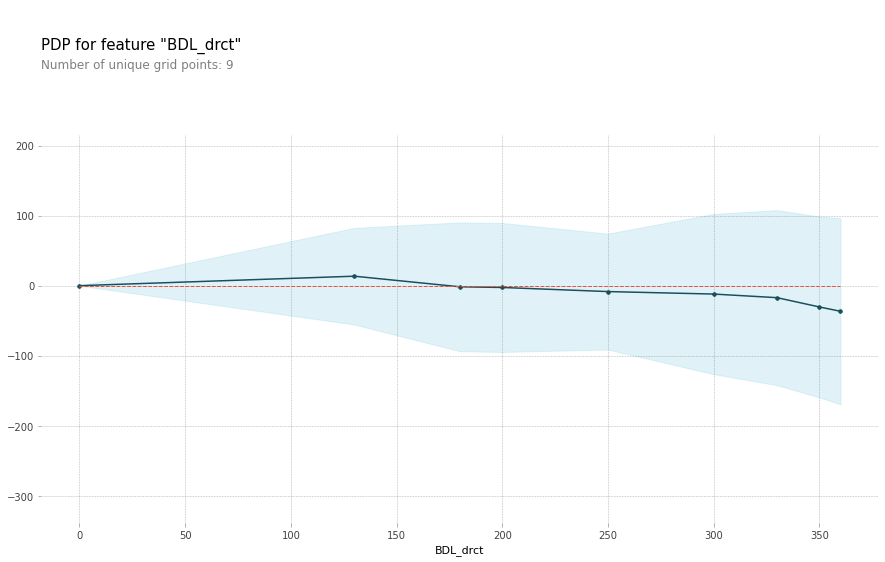

In [46]:
pdp_goals = pdp.pdp_isolate(model=clf, dataset=X_train, model_features=X_train.columns, feature=X_train.columns[3])
pdp.pdp_plot(pdp_goals, X_train.columns[3])
plt.show()

Energy demand is a flat line around 0 as Wind Direction in degrees from *true* north increases. 

However, this is also due to the fact that the energy demanding range for this feature is -100 to 100.

### Top 5 PDP for feature "BDL_sknt"

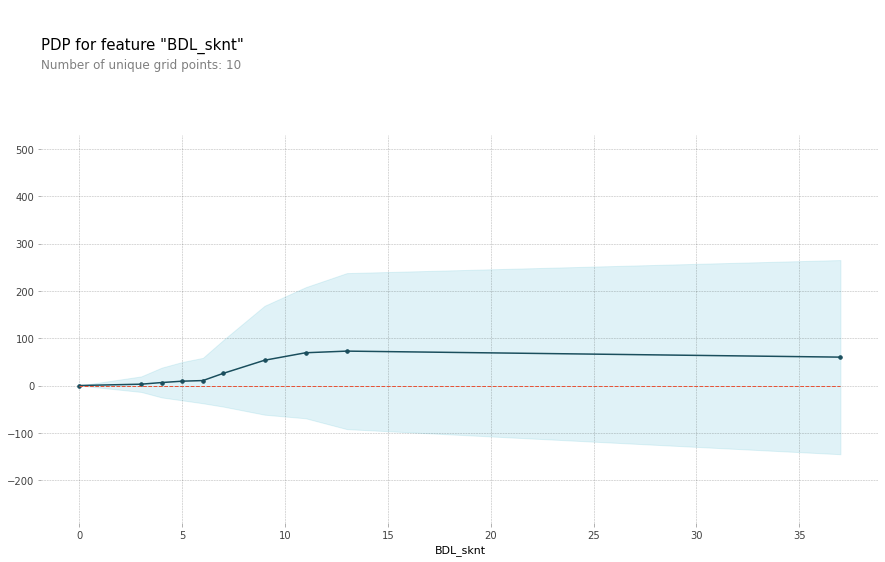

In [47]:
pdp_goals = pdp.pdp_isolate(model=clf, dataset=X_train, model_features=X_train.columns, feature=X_train.columns[4])
pdp.pdp_plot(pdp_goals, X_train.columns[4])
plt.show()

Energy demand is a flat line around 0 as Wind Speed increases.

However, this is also due to the fact that the energy demanding range for this feature is -200 to 200.

# (10 pts) Conclusion
* Our best test MAE was: 397.45
* Our best test RMSE was: 491.53



# Rubric
The most important thing to start is your test MAE and test RMSE. We will choose the winner based on the composite highest rank for each score.

For example, if you had the 3rd best MAE and 8th best RMSE, your composite rank would be 5.5 - then we sort the class composite ranks from high to low. Good luck!

We will take off up to 15 points per section if content is lacking, poor quality or missing - treat everything as important. We expect lots of 'Text' cells with plain language descriptions (should read like a technical report), and of course the code should be rich with comments.



In [48]:
end = time.time()
print(f"Minutes Elapsed: {(end-start)/60}")

Minutes Elapsed: 2.6275946935017904


Here is our appendix script link: 
https://colab.research.google.com/drive/13Yql7M2C4Ehi62biWdBjwjN24_7e3ufw?usp=sharing